In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.sparse import hstack

In [2]:
path = '/content/data (1).csv'
df = pd.read_csv(path)

print(df.head())

                                          clean_text  label
0                  film really not_so much bad bland      0
1  sometimes incisive sensitive portrait undercut...      0
2  kind nervous film either give mild headache ex...      1
3  falsehood pile undermine movie reality stifle ...      0
4  hoffman notch nuance pain smart edgy voice wad...      1


In [3]:
df.shape

(17668, 2)

In [4]:
df.columns

Index(['clean_text', 'label'], dtype='object')

In [5]:
print(df['label'].unique())
print(df['label'].value_counts())


[0 1]
label
1    10140
0     7528
Name: count, dtype: int64


# **EDA**

<ipython-input-6-fcafe21eaa91>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='coolwarm')


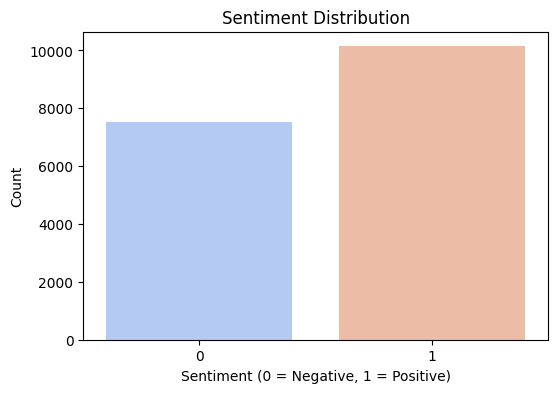

In [6]:
# Visualization 1: Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label', palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()


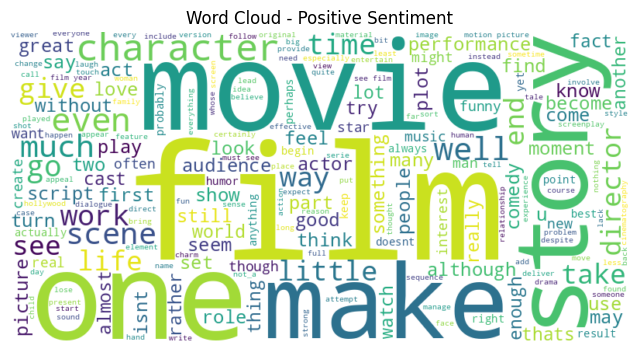

In [7]:
# Visualization 2: Word Cloud for Positive Sentiment
positive_reviews = ' '.join(df[df['label'] == 1]['clean_text'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Sentiment')
plt.show()

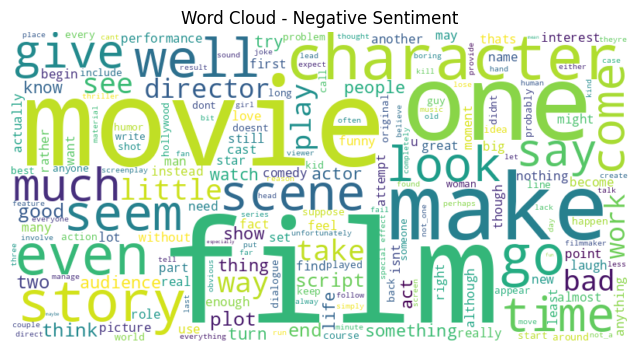

In [8]:
# Visualization 3: Word Cloud for Negative Sentiment
negative_reviews = ' '.join(df[df['label'] == 0]['clean_text'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Sentiment')
plt.show()

# **Feature Extraction**

In [9]:
texts_cleaned = df['clean_text'].tolist()
labels = df['label'].tolist()

In [10]:
# Feature extraction (TF-IDF and CountVectorizer)
tfidf = TfidfVectorizer(min_df=5)
count = CountVectorizer(min_df=5)

X_tfidf = tfidf.fit_transform(texts_cleaned)
X_count = count.fit_transform(texts_cleaned)
y = labels

# Split data
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_count, X_test_count, _, _ = train_test_split(X_count, y, test_size=0.2, random_state=42)

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate using TF-IDF
print("Accuracy using TF-IDF:")
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, preds)
    print(f"{name}: {acc:.4f}")

# Train and evaluate using Count Vectorizer
print("\nAccuracy using Count Vectorizer:")
for name, model in models.items():
    model.fit(X_train_count, y_train)
    preds = model.predict(X_test_count)
    acc = accuracy_score(y_test, preds)
    print(f"{name}: {acc:.4f}")


Accuracy using TF-IDF:
Naive Bayes: 0.7405
Logistic Regression: 0.7957
Decision Tree: 0.6579
Random Forest: 0.7349

Accuracy using Count Vectorizer:
Naive Bayes: 0.7617
Logistic Regression: 0.7852
Decision Tree: 0.6590
Random Forest: 0.7363


# **Combine TF-IDF with Count Vectorize**

In [11]:
tfidf = TfidfVectorizer(min_df=5)
count = CountVectorizer(min_df=5)

X_tfidf = tfidf.fit_transform(texts_cleaned)
X_count = count.fit_transform(texts_cleaned)
y = labels

# Combine features
X_combined = hstack([X_tfidf, X_count])


X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")


Naive Bayes Accuracy: 0.7787
Logistic Regression Accuracy: 0.7875
Decision Tree Accuracy: 0.6559
Random Forest Accuracy: 0.7334
